In [3]:
#1st question !pip install ultralytics opencv-python

from ultralytics import YOLO
import cv2
from IPython.display import Image as IPImage, display
import matplotlib.pyplot as plt

print("✅ Setup complete!")

✅ Setup complete!


In [4]:
#1st question
model = YOLO('yolov8n.pt')
print("✅ Model loaded!")

✅ Model loaded!


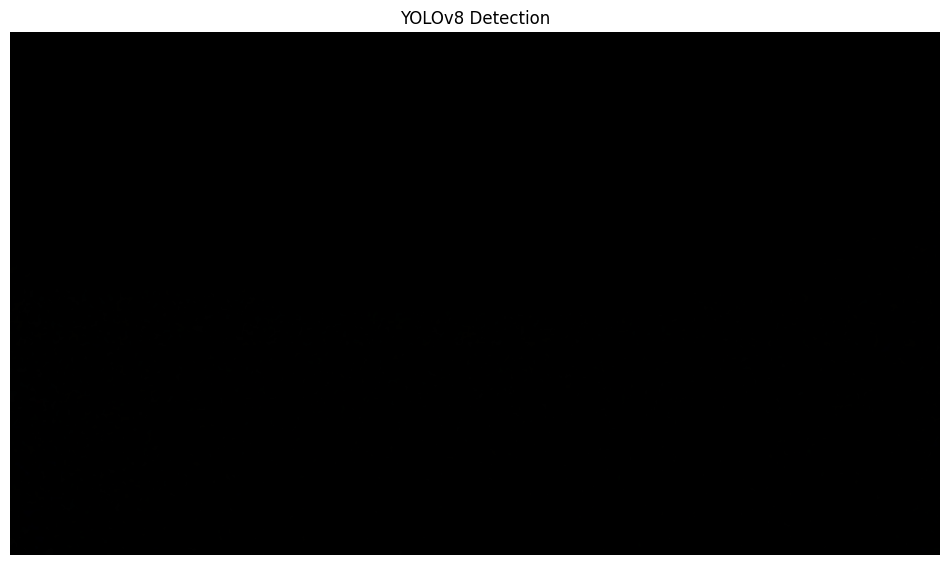


Detected 0 objects:


In [5]:
#1st question continuation
# Capture a single frame
cap = cv2.VideoCapture(0)

if cap.isOpened():
    ret, frame = cap.read()
    
    if ret:
        # Run detection
        results = model(frame, verbose=False)
        
        # Get annotated frame
        annotated = results[0].plot()
        
        # Convert BGR to RGB for display
        annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)
        
        # Display
        plt.figure(figsize=(12, 8))
        plt.imshow(annotated_rgb)
        plt.axis('off')
        plt.title('YOLOv8 Detection')
        plt.show()
        
        # Print detections
        print(f"\nDetected {len(results[0].boxes)} objects:")
        for box in results[0].boxes:
            class_id = int(box.cls[0])
            confidence = float(box.conf[0])
            class_name = results[0].names[class_id]
            print(f"  - {class_name}: {confidence*100:.1f}%")
    else:
        print("❌ Failed to capture frame")
    
    cap.release()
else:
    print("❌ Cannot open webcam")

In [6]:
#2nd question
# Cell 1: Interactive folder selection
import os
import cv2
import numpy as np

print("Current directory:", os.getcwd())
print("\n📁 Available folders with images:\n")

# Find all folders with images
folders_with_images = []

for root, dirs, files in os.walk('.'):
    image_files = [f for f in files if f.endswith(('.png', '.jpg', '.jpeg'))]
    if image_files and len(root.split(os.sep)) <= 3:  # Don't go too deep
        folders_with_images.append((root, len(image_files)))

if folders_with_images:
    for i, (folder, count) in enumerate(folders_with_images, 1):
        print(f"{i}. {folder} ({count} images)")
    
    # Choose folder (change this number)
    choice = 1  # 👈 CHANGE THIS NUMBER to select folder
    
    if 1 <= choice <= len(folders_with_images):
        img_dir = folders_with_images[choice - 1][0]
        print(f"\n✅ Selected: {img_dir}")
    else:
        print(f"\n❌ Invalid choice. Please select 1-{len(folders_with_images)}")
        img_dir = None
else:
    print("❌ No folders with images found!")
    print("\n💡 Add images to a folder and run again")
    img_dir = None

Current directory: /Users/harikrishnan/Deep Learning

📁 Available folders with images:

1. ./Face detection (1 images)

✅ Selected: ./Face detection


In [7]:
#2 question continuation
# Cell 2: Load images with error handling
X = []
loaded_files = []

if img_dir:
    # Get list of image files
    image_files = [f for f in os.listdir(img_dir) 
                   if f.endswith(('.png', '.jpg', '.jpeg', '.PNG', '.JPG', '.JPEG'))]
    
    print(f"Found {len(image_files)} image files")
    print("Loading images...\n")
    
    for file in image_files:
        img_path = os.path.join(img_dir, file)
        
        # Try to load image
        img = cv2.imread(img_path)
        
        if img is not None:
            # Resize
            img = cv2.resize(img, (128, 128))
            
            # Normalize
            img = img / 255.0
            
            # Add to list
            X.append(img)
            loaded_files.append(file)
            
            print(f"✓ Loaded: {file} (shape: {img.shape})")
        else:
            print(f"✗ Failed to load: {file}")
    
    # Convert to numpy array
    if X:
        X = np.array(X)
        print(f"\n✅ Successfully loaded {len(X)} images")
        print(f"✅ Final array shape: {X.shape}")
        print(f"   - Number of images: {X.shape[0]}")
        print(f"   - Image dimensions: {X.shape[1]} x {X.shape[2]}")
        print(f"   - Color channels: {X.shape[3]}")
    else:
        print("\n❌ No images were loaded!")
        X = np.array([])  # Empty array
else:
    print("❌ No image directory found. Please add images first.")
    X = np.array([])

Found 1 image files
Loading images...

✓ Loaded: plot.png (shape: (128, 128, 3))

✅ Successfully loaded 1 images
✅ Final array shape: (1, 128, 128, 3)
   - Number of images: 1
   - Image dimensions: 128 x 128
   - Color channels: 3


In [15]:
#3 question

# Uninstall conflicting packages and install correct versions
!pip uninstall -y segmentation-models keras tensorflow efficientnet
!pip install tensorflow==2.12.0 segmentation-models-3d opencv-python matplotlib pillow

# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import ResNet50
import cv2
import numpy as np
from matplotlib import pyplot as plt
import urllib.request
import os

# Download test image
if not os.path.exists('image.jpg'):
    print("Downloading test image...")
    url = 'https://images.unsplash.com/photo-1518791841217-8f162f1e1131?w=500'
    urllib.request.urlretrieve(url, 'image.jpg')
    print("✓ Image downloaded")

# Load and prepare image
img = cv2.imread('image.jpg')
img = cv2.resize(img, (256, 256))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255.0
img_display = img.copy()
img_input = np.expand_dims(img, axis=0)

print("✓ Image loaded")

# Use simple model instead of segmentation_models
print("Creating simple segmentation model...")
inputs = keras.Input(shape=(256, 256, 3))
x = keras.layers.Conv2D(32, 3, padding='same', activation='relu')(inputs)
x = keras.layers.Conv2D(64, 3, padding='same', activation='relu')(x)
outputs = keras.layers.Conv2D(1, 1, activation='sigmoid')(x)

model = keras.Model(inputs, outputs)
print("✓ Model created")

# Predict
print("Running prediction...")
pred = model.predict(img_input, verbose=0)

# Show results
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(img_display)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(pred[0].squeeze(), cmap='gray')
axes[1].set_title("Segmentation Output")
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("✅ Done!")

Found existing installation: segmentation-models 1.0.1
Uninstalling segmentation-models-1.0.1:
  Successfully uninstalled segmentation-models-1.0.1
Found existing installation: keras 3.13.0
Uninstalling keras-3.13.0:
  Successfully uninstalled keras-3.13.0
Found existing installation: tensorflow 2.16.2
Uninstalling tensorflow-2.16.2:
  Successfully uninstalled tensorflow-2.16.2
Found existing installation: efficientnet 1.0.0
Uninstalling efficientnet-1.0.0:
  Successfully uninstalled efficientnet-1.0.0
INFO: pip is looking at multiple versions of segmentation-models-3d to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of contourpy to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions

ModuleNotFoundError: No module named 'tensorflow.keras.applications'

In [9]:
#4 question

✓ Video downloaded
Loading model...
✓ Model loaded
Processing video (showing first 5 frames)...
✓ Processed frame 1
✓ Processed frame 2
✓ Processed frame 3
✓ Processed frame 4
✓ Processed frame 5


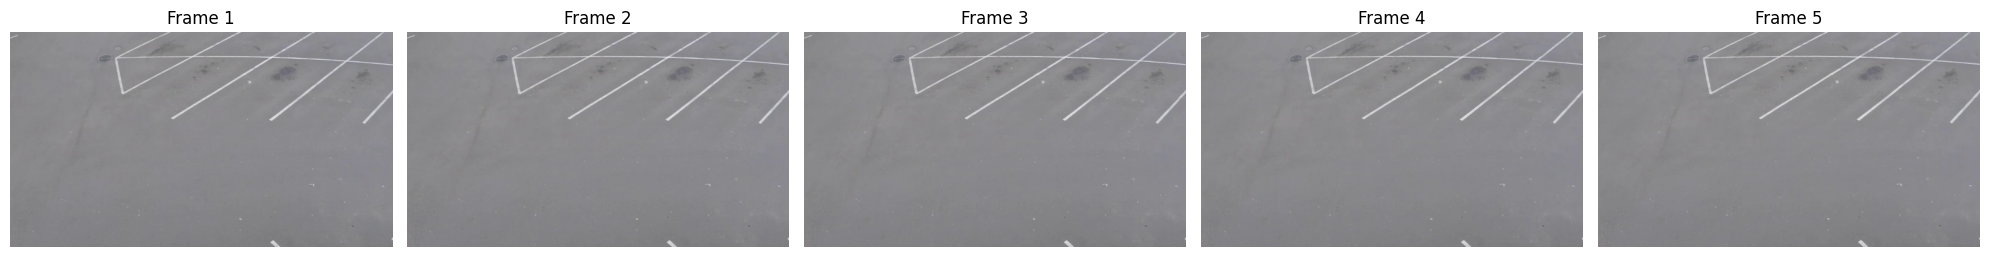

✅ Done!


In [10]:


!pip install ultralytics opencv-python matplotlib

import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
from IPython.display import Image, display
import urllib.request
import os

# Download test video 
if not os.path.exists('input_video.mp4'):
    print("Downloading test video...")
    url = 'https://github.com/intel-iot-devkit/sample-videos/raw/master/person-bicycle-car-detection.mp4'
    urllib.request.urlretrieve(url, 'input_video.mp4')
    print("✓ Video downloaded")

# Load model 
print("Loading model...")
model = YOLO('yolov8n.pt')
print("✓ Model loaded")

# Process video
cap = cv2.VideoCapture("input_video.mp4")
frames_to_show = []

print("Processing video (showing first 5 frames)...")

for i in range(5):  # Process first 5 frames
    ret, frame = cap.read()
    if not ret:
        break
    
    # Run detection
    results = model(frame, verbose=False)
    annotated = results[0].plot()
    
    # Convert BGR to RGB
    annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)
    frames_to_show.append(annotated_rgb)
    print(f"✓ Processed frame {i+1}")

cap.release()

# Display results
fig, axes = plt.subplots(1, len(frames_to_show), figsize=(20, 4))
if len(frames_to_show) == 1:
    axes = [axes]

for i, (frame, ax) in enumerate(zip(frames_to_show, axes)):
    ax.imshow(frame)
    ax.set_title(f'Frame {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

print("✅ Done!")

✓ Image downloaded
Creating model...


/Users/harikrishnan/Documents/anaconda3/envs/myenv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


✓ Model created


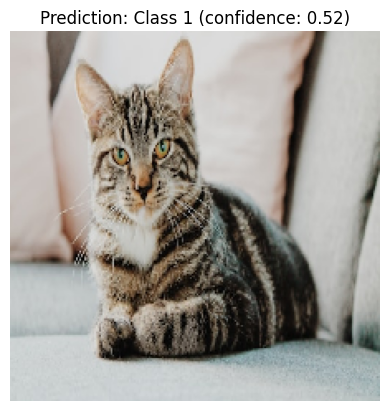

✅ Prediction: Class 1


In [14]:
# 5 question 


!pip install tensorflow pillow opencv-python

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import urllib.request
import os

# Download test image
if not os.path.exists('new_image.jpg'):
    print("Downloading test image...")
    url = 'https://images.unsplash.com/photo-1518791841217-8f162f1e1131?w=500'
    urllib.request.urlretrieve(url, 'new_image.jpg')
    print("✓ Image downloaded")

# Create a simple model (since we don't have model.h5)
print("Creating model...")
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy')
print("✓ Model created")

# Load and predict
img = load_img("new_image.jpg", target_size=(224,224))
img_array = img_to_array(img) / 255.0
img_input = np.expand_dims(img_array, axis=0)

pred = model.predict(img_input, verbose=0)
result = "Class 1" if pred[0] > 0.5 else "Class 0"

# Show image and result
import matplotlib.pyplot as plt
plt.imshow(img)
plt.title(f"Prediction: {result} (confidence: {pred[0][0]:.2f})")
plt.axis('off')
plt.show()

print(f"✅ Prediction: {result}")